In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import IntervalKMeans
from interClusLib.visualization import ClusteringVisualization

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         15.061502        33.896969        17.659688        84.843662   
1         48.084802        65.792458        18.115847        62.296931   
2         27.082644        88.637033        16.647108        55.461713   
3         34.632004        75.005987         5.260286        32.511498   
4         63.818774        70.445610        28.470108        47.041362   
5         45.746499        79.257145        27.034987        52.946421   
6         56.504326        77.184250        88.057873        94.011312   
7         55.930597        56.733590        44.525561        73.475101   
8         71.594221        81.645012        28.239506        44.732918   
9         26.229542        44.856859        65.358026        81.980990   
10        65.418362        85.392243         3.061572        49.507

In [2]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  

<class 'interClusLib.data_structure.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)


In [3]:
distance_matrix = IntervalMetrics.pairwise_distance(random_data.get_intervals(),"hausdorff","mean")

print(distance_matrix)

[[ 0.         20.21314013 26.78875275 31.31550957 26.02457158 18.44281978
  31.83947606 15.22278927 30.90210344 23.58078305 34.18262468 26.17142623
  24.15800562 28.9292457  25.88358011 25.37792527 24.86109057 12.6897728
  32.13945594 34.52920372 14.86994711 37.3884646  28.53576107 31.35772329
  19.67515181 21.0461022  18.5376654  21.91967467 12.41554469 25.35655585]
 [20.21314013  0.         10.15199877 14.73061676  7.74786937  9.08723484
  28.20457199 13.53753656 10.68896331 24.94221589 14.04551103 19.22165683
  12.2236825  17.52350648 15.86961052 12.70520069  8.46997127 20.82518244
  25.29380832 22.82294073 17.70036408 24.68907286 24.15924652 18.58603795
  12.80502112 28.37741442 11.27942971 23.72817124 12.41138441 20.10265542]
 [26.78875275 10.15199877  0.         10.88988863 14.10573131 15.08723415
  36.15086939 23.68953533 13.10994009 23.9643668  11.35707021 19.14997735
   7.62029718 22.17608464 22.11693604 19.73615527 10.92790759 26.16846907
  20.15117005 17.92390849 18.9449347 

In [4]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean") 

print(model.labels_)

[3 2 2 2 2 2 0 1 2 1 2 3 2 2 2 1 2 3 3 1 1 0 2 2 3 1 2 0 1 1]


In [5]:
def plot_intervals_as_squares(intervals, labels=None):
    fig= plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    ClusteringVisualization.draw_3d_interval_cubes(ax, intervals, labels)

    xs = intervals[:, 0, :].ravel()  # x_lower, x_upper
    ys = intervals[:, 1, :].ravel()  # y_lower, y_upper
    zs = intervals[:, 2, :].ravel()  # z_lower, z_upper

    x_min, x_max = xs.min() - 5, xs.max() + 5
    y_min, y_max = ys.min() - 5, ys.max() + 5
    z_min, z_max = zs.min() - 5, zs.max() + 5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title("3D")

    plt.show()

In [6]:
print(random_data.get_intervals().shape[1])
print(random_data.get_intervals().shape)

print(random_data.get_intervals())

print("NaN count:", np.isnan(random_data.get_intervals()).sum(), "Inf count:", np.isinf(random_data.get_intervals()).sum())

3
(30, 3, 2)
[[[15.06150189 33.89696945]
  [17.6596878  84.84366222]
  [ 2.29889269 70.86968388]]

 [[48.08480246 65.79245834]
  [18.11584667 62.29693123]
  [30.80538328 76.17651361]]

 [[27.08264442 88.63703326]
  [16.647108   55.46171258]
  [46.81885201 89.92650528]]

 [[34.63200432 75.00598695]
  [ 5.26028586 32.51149832]
  [63.09529197 72.55525622]]

 [[63.81877386 70.44560987]
  [28.47010823 47.04136181]
  [35.33810934 65.33198974]]

 [[45.74649889 79.25714536]
  [27.03498659 52.94642064]
  [ 5.0133969  70.26028854]]

 [[56.50432593 77.18424972]
  [88.05787283 94.01131193]
  [15.09342007 44.12876657]]

 [[55.93059742 56.7335901 ]
  [44.52556108 73.47510147]
  [ 2.14731721 70.25611321]]

 [[71.59422074 81.64501248]
  [28.2395064  44.73291835]
  [34.77288866 79.41680279]]

 [[26.22954186 44.8568593 ]
  [65.3580263  81.98098999]
  [70.74158059 74.08542594]]

 [[65.41836158 85.39224251]
  [ 3.06157194 49.50774398]
  [41.70127374 84.77688408]]

 [[18.95082012 95.81386259]
  [ 6.5572668

Adding cube with X: 56.50432593452464-77.18424971577515, Y: 88.0578728306418-94.01131192634348, Z: 15.09342007164144-44.12876656720643
Adding cube with X: 55.530755857790545-85.87927488631706, Y: 83.29739534929847-83.77471736327026, Z: 64.74771566267373-74.66238157793849
Adding cube with X: 3.0622412922089226-80.59658508515845, Y: 66.77263104745744-97.6445925003946, Z: 17.4633626572961-78.60977277128917
Adding cube with X: 55.93059741911324-56.73359010409019, Y: 44.525561082693635-73.47510146956259, Z: 2.1473172115410333-70.25611321314952
Adding cube with X: 26.229541864334116-44.85685930498822, Y: 65.35802630249744-81.98098999349529, Z: 70.74158059157189-74.0854259388256
Adding cube with X: 47.213718151918236-64.49755706436805, Y: 66.17927865625838-75.8100515068121, Z: 43.294049569345106-69.05436187028371
Adding cube with X: 40.29238921811815-90.80552658721199, Y: 50.288281998264196-83.4552086707472, Z: 77.34939470233192-88.22636553163545
Adding cube with X: 25.218442362842495-27.2498

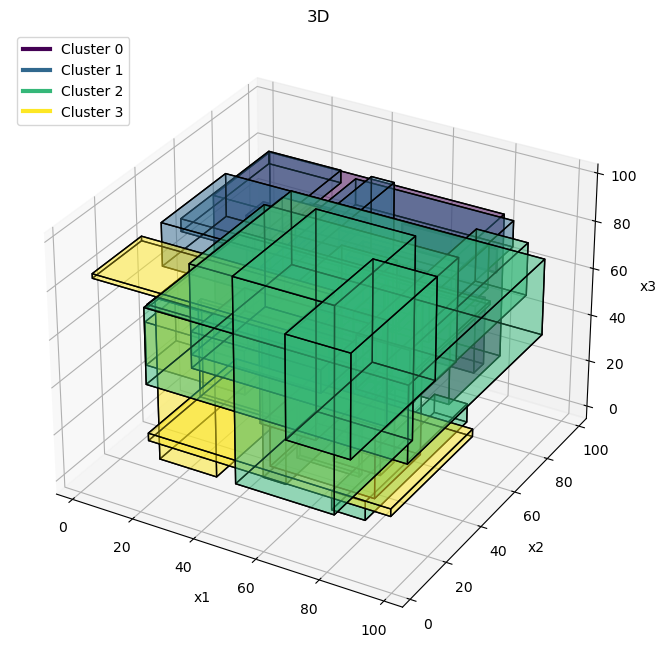

In [7]:
plot_intervals_as_squares(random_data.get_intervals(), model.labels_)

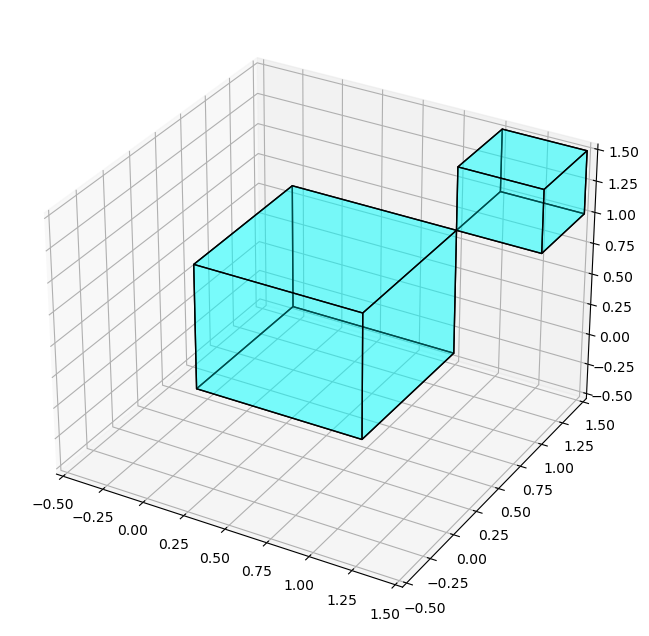

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x_lower, x_upper = 0, 1
y_lower, y_upper = 0, 1
z_lower, z_upper = 0, 1

ax.set_xlim([x_lower-0.5, x_upper+0.5])
ax.set_ylim([y_lower-0.5, y_upper+0.5])
ax.set_zlim([z_lower-0.5, z_upper+0.5])

c000 = (x_lower, y_lower, z_lower)
c001 = (x_lower, y_lower, z_upper)
c010 = (x_lower, y_upper, z_lower)
c011 = (x_lower, y_upper, z_upper)
c100 = (x_upper, y_lower, z_lower)
c101 = (x_upper, y_lower, z_upper)
c110 = (x_upper, y_upper, z_lower)
c111 = (x_upper, y_upper, z_upper)

faces = [
    [c000, c010, c011, c001],  # x_lower face
    [c100, c101, c111, c110],  # x_upper face
    [c000, c001, c101, c100],  # y_lower face
    [c010, c011, c111, c110],  # y_upper face
    [c000, c100, c110, c010],  # z_lower face
    [c001, c101, c111, c011],  # z_upper face
]

cube = Poly3DCollection(faces, edgecolor="black", facecolor="cyan", alpha=0.3, linewidths=1)

# 添加到 3D 画布
ax.add_collection3d(cube)

x_lower, x_upper = 1, 1.5
y_lower, y_upper = 1, 1.5
z_lower, z_upper = 1, 1.5


c000 = (x_lower, y_lower, z_lower)
c001 = (x_lower, y_lower, z_upper)
c010 = (x_lower, y_upper, z_lower)
c011 = (x_lower, y_upper, z_upper)
c100 = (x_upper, y_lower, z_lower)
c101 = (x_upper, y_lower, z_upper)
c110 = (x_upper, y_upper, z_lower)
c111 = (x_upper, y_upper, z_upper)

faces = [
    [c000, c010, c011, c001],  # x_lower face
    [c100, c101, c111, c110],  # x_upper face
    [c000, c001, c101, c100],  # y_lower face
    [c010, c011, c111, c110],  # y_upper face
    [c000, c100, c110, c010],  # z_lower face
    [c001, c101, c111, c011],  # z_upper face
]

cube = Poly3DCollection(faces, edgecolor="black", facecolor="cyan", alpha=0.3, linewidths=1)

# 添加到 3D 画布
ax.add_collection3d(cube)

# 设置坐标轴范围

plt.show()